# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.

In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [2]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheet_name=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [3]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [4]:
df_merge = df_offers.merge(df_transactions)
df_pivot = pd.pivot_table(df_merge, values='n', columns='offer_id', index='customer_name', fill_value=0)
df_pivot.head(50)

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
Barnes,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
Bell,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bennett,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
Brooks,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

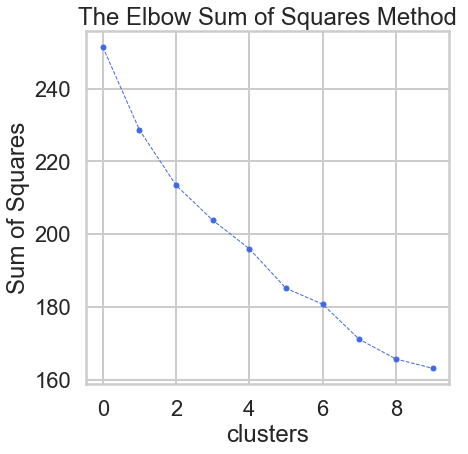

In [5]:
from sklearn.cluster import KMeans
import numpy as np

x_cols = df_pivot.values
K = np.arange(2, 12, 1)
inertias = []

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(x_cols)
    inertias.append(model.inertia_)
    
f, ax = plt.subplots(figsize=(6.5, 6.5))  
_ = plt.plot(inertias, linewidth=1, markersize=5, marker='o', linestyle='dashed', color='royalblue') 
_ = plt.xlabel('clusters')
_ = plt.ylabel('Sum of Squares')
_ = plt.title('The Elbow Sum of Squares Method')
plt.show() 

Lower values of *SS* represent lower distances between points and the centroid of the cluster where they were assigned. We want to know how much clusters are necessary to separate classes the maximum possible between them but asserting that the points into them are close to the centroid. Otherwise, why do those points belong to a cluster and don't belong to another?

The challenge of using this method is how to determine the elbow point. We are looking for a point where *SS* starts to decrease more slowly and in this case, this point could be 1, 3 or 6, for example. If the 'elbow' is not extremely clear and easy to find, Elbow method just gives you a notion of the range that you must inspect. 

In the following analysis, we use 3 clusters. The number of points in each cluster is:

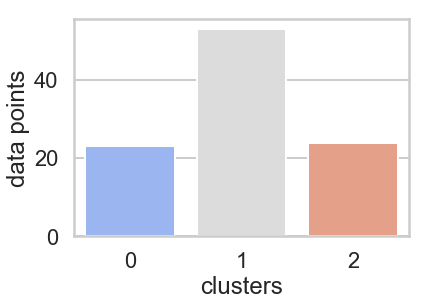

In [6]:
k = 3
model = KMeans(n_clusters=k)
labels_true = model.fit_predict(x_cols)
df_pivot['cluster_id'] = labels_true
df_pivot['counter'] = 1

df_clusters = df_pivot.groupby('cluster_id').count().head()
_ = sns.barplot(x=df_clusters.index, y="counter", data=df_clusters, palette='coolwarm')
_ = plt.xlabel('clusters')
_ = plt.ylabel('data points')

With this method, you need more expertise to see the plot and know that number of clusters use!

### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

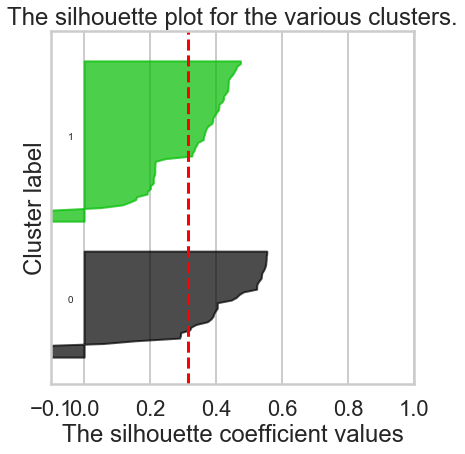

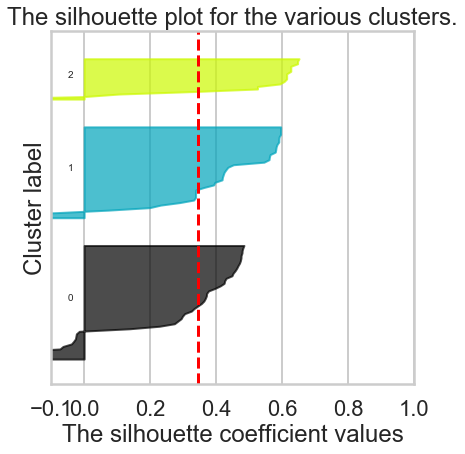

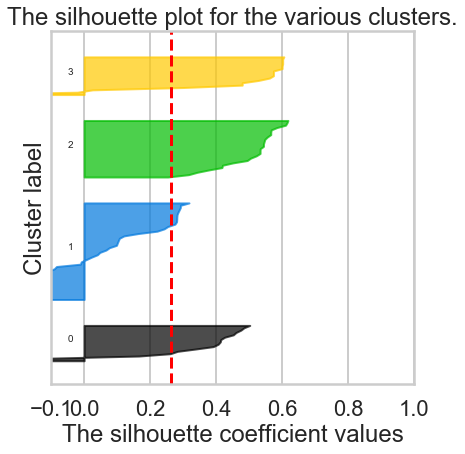

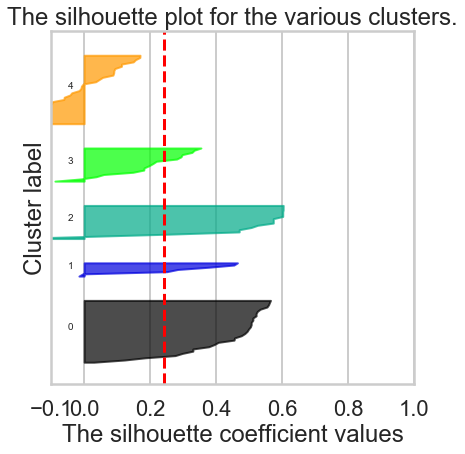

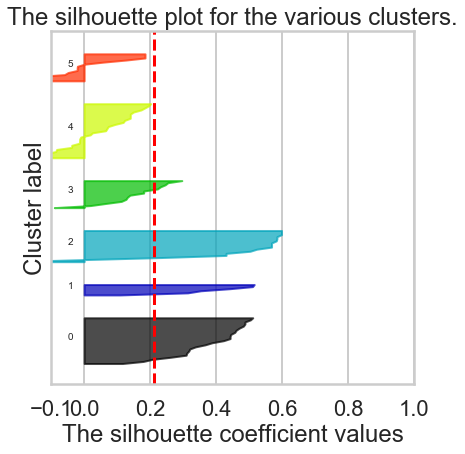

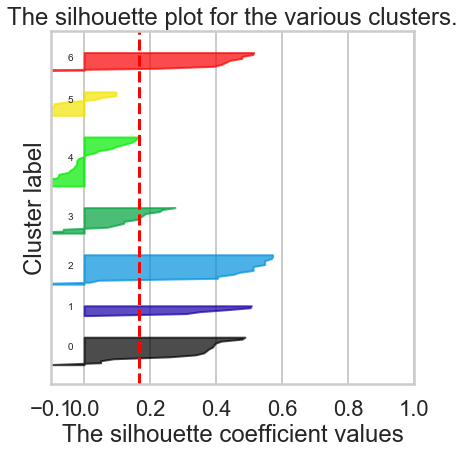

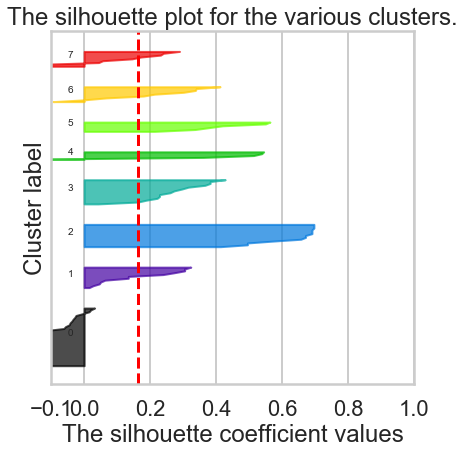

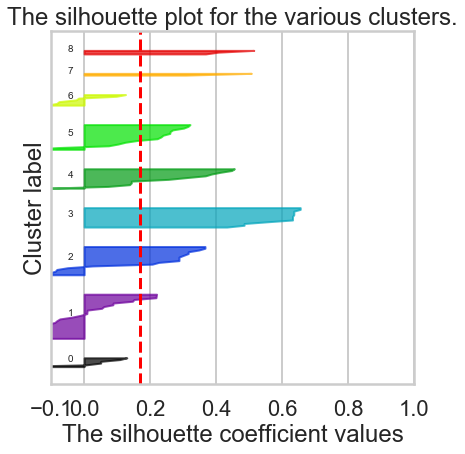

In [7]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

K = np.arange(2, 10, 1)

for k in K:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots()
    fig.set_size_inches(6.5, 6.5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
  
    clusterer = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusterer.fit_predict(x_cols)
    X = clusterer.transform(x_cols)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)  
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(X) + (k + 1) * 10])
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

The Average silhouette scores suggests that is hard to find a good number of clusters for this data. No model generates silhouette close to 1 and the average of all clusters in the model doesn't not exceed 0.4. Higher K generates some clusters with a score less than the average. 2 or 3 clusters are more reasonable and we choose 3 because the average score is slithly better than in 2 clusters case. 

*Elbow Sum-of-Squares Method* by itself allow us having an intuition about how to choose the parameter to fit the model and we corroborate our previous conclusion using the *Average Silhouette Scores*.

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
points = pca.fit_transform(x_cols)

df_pca = pd.DataFrame({'customer_name': df_pivot.index, 
                       'cluster_id': df_pivot.cluster_id, 
                       'x': points[:, 0], 
                       'y': points[:, 1]})

In [9]:
df_pca.head()
#df_pca[['cluster_id', 'x', 'y']]
#print (df_pca.index)
#print(pca.fit_predict(x_cols))
#_ = sns.scatterplot(x, y)

,customer_name,cluster_id,x,y
customer_name,,,,
Adams,Adams,2,1.007580,0.108215
Allen,Allen,1,-0.287539,0.044715
Anderson,Anderson,1,-0.392032,1.038391
Bailey,Bailey,2,0.699477,-0.022542
Baker,Baker,1,0.088183,-0.471695


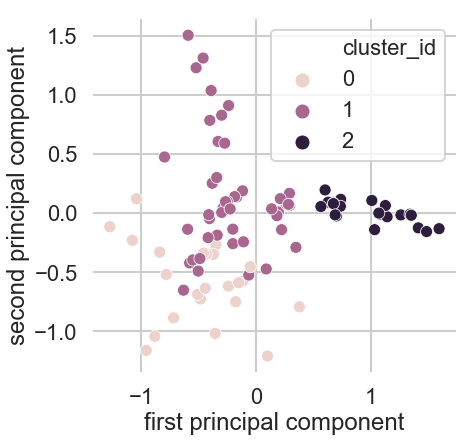

In [10]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
_ = sns.despine(f, left=True, bottom=True)
_ = sns.scatterplot(x='x', y='y',
                hue='cluster_id',
                data=df_pca, ax=ax)
_ = plt.xlabel('first principal component')
_ = plt.ylabel('second principal component')

Splitting the data in three clusters makes sense and we can represent the features using just two categories (above 32 in the original dataset). Using the clusters founded with KMeans and the Principal Components as coordinates x and y, we can build a bidimensional scatter plot with the data points belongs to every cluster. And it is amazing, because now every customer is represented as a 2D point and we can observe and discoverying patterns from them easily and extract more intuitive conclusion. Let's do that!

In [11]:
df_merge_pca = df_merge.merge(df_pca)
df_merge_pca.head()

/Users/daniela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'customer_name' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n,cluster_id,x,y
0,1,January,Malbec,72,56,France,False,Thomas,1,0,-1.041879,0.122314
1,4,February,Champagne,72,48,France,True,Thomas,1,0,-1.041879,0.122314
2,9,April,Chardonnay,144,57,Chile,False,Thomas,1,0,-1.041879,0.122314
3,11,May,Champagne,72,85,France,False,Thomas,1,0,-1.041879,0.122314
4,14,June,Merlot,72,64,Chile,False,Thomas,1,0,-1.041879,0.122314


### 1. Which kind of wines are more frequently included in the campaigns?

In the following plot, we display the type of wines offered in the campaign which customer responded to. The shape of the points depend on the cluster to which them belong and the colors represent the kind of wine. We discover that in cluster 2 the most popular wine is Pinot Noir and the other clusters have more variety: cluster zero includes Malbec (higher frequence), Espumante and Pinot Grigio and in cluster one we can find Pinot Noir, Chardonay and Malbec, but the most popular is Champagne.

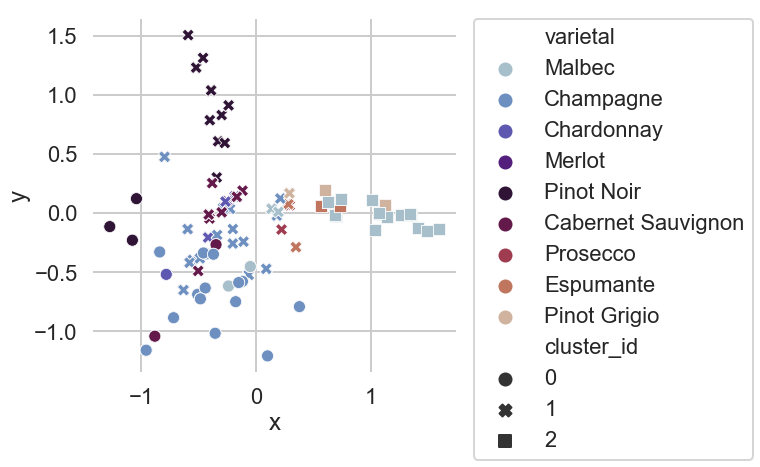

In [12]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
_ = sns.despine(f, left=True, bottom=True)
_ = sns.scatterplot(x='x', y='y',
                hue='varietal', style='cluster_id',
                data=df_merge_pca, ax=ax,
                palette='twilight')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 2. What clusters tell us about the origin of the campaigns?

In the following plot, we display the origin of wines offered in the campaign which customer responded to. Again, the shape of the points depend on the cluster to which them belong and the colors represent the origin of wine. Customers on cluster two respond to campaigns with wines from Australia mainly; on cluster one wines from France are more popular and the cluster zero there is more variety, but french wine has the highest frequency.

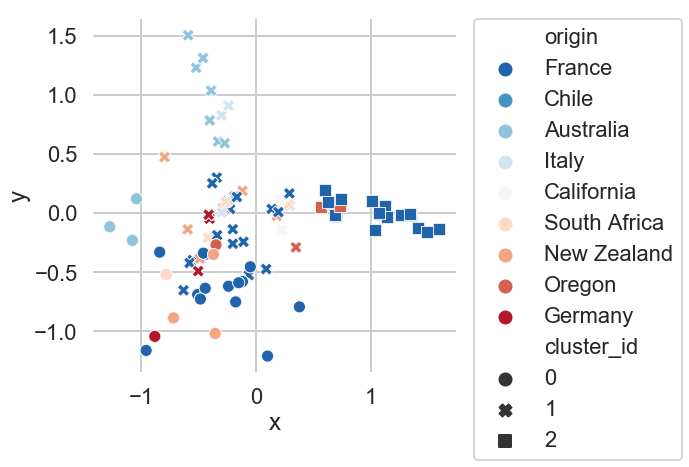

In [13]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
_ = sns.despine(f, left=True, bottom=True)
_ = sns.scatterplot(x='x', y='y',
                hue='origin', style='cluster_id',
                data=df_merge_pca, ax=ax,
                palette='RdBu_r')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 3. What clusters tell us about the season of the campaigns?

The next plot shows the Northern Meteorological Seasons of the campaigns which customer responded to. Customers in cluster two responded to campaigns in fall: Meanwhile, people in cluster zero and one bought wines in campaigns on winter mainly, but in summer and autumn too.

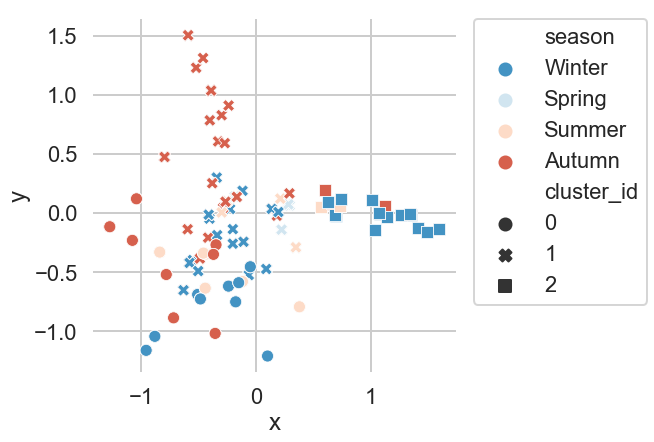

In [14]:
period = []
list_month = df_merge_pca.campaign

for month in list_month:
    if month in ['December','February', 'January']:
        period.append('Winter')
    elif month in ['April','May','March']:
        period.append('Spring')
    elif month in ['June', 'July', 'August']:
        period.append('Summer')
    else:
        period.append('Autumn')

df_merge_pca['season'] = period
df_merge_pca.head()

f, ax = plt.subplots(figsize=(6.5, 6.5))
_ = sns.despine(f, left=True, bottom=True)
_ = sns.scatterplot(x='x', y='y',
                hue='season', style='cluster_id',
                data=df_merge_pca, ax=ax,
                palette= 'RdBu_r')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

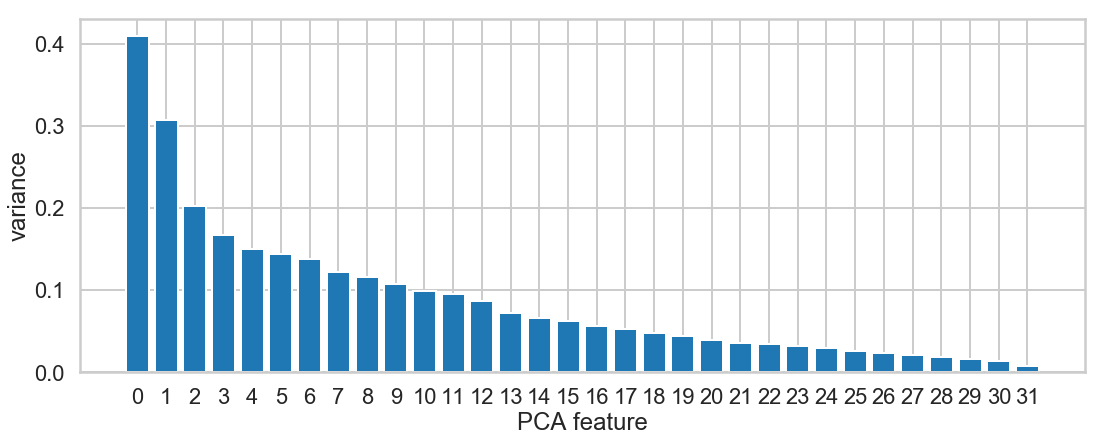

In [15]:
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(x_cols)
features = range(pca.n_components_)

f, ax = plt.subplots(figsize=(18, 6.5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('variance')
_ = plt.xticks(features)
plt.show()

The possible value for the optimal number of dimensions could be 2 features. And we are using that!

## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


### Affinity propagation:

Affinity Propagation choose the number of clusters based on the data and the two more important parameters are the preference (how many exemplars are used) and the damping factor, that moderate the responsability and availability of messages to avoid numerical oscillations. 

Silhouette measures how well each datapoint "fits" its assigned cluster and also how poorly it fits into other clusters. 

a) Using PCA principal components previously computed:

In [16]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation(damping=.5, preference=-20).fit(points)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(points, labels, metric='sqeuclidean'))

Estimated number of clusters: 3
Silhouette Coefficient: 0.706


b) Using original features vector:

In [17]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation(damping=.5).fit(x_cols)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x_cols, labels, metric='sqeuclidean'))

Estimated number of clusters: 14
Silhouette Coefficient: 0.180


If we use 80 exemplars of input vector (that contains only the two principal components got by PCA) and a damp factor of 0.5, we got 3 clusters again and a Silhouette Coefficient 0.706, indicating a strong structure. Using all the examplares and the default damp factor of 0.5, we got 14 clusters and a Silhouette of 0.180. The principal components help us to find a consistent structure, because if we put the `x_cols`, the original datapoints with 32 components, it's impossible to get a reasonable structure with this clustering method.

### Spectral clustering

a) Using PCA principal components previously computed:

In [18]:
from sklearn.cluster import SpectralClustering

K_list = np.arange(3, 20, 1)

silhouette = -1
best_k = 0

for k in K_list:
    clustering = SpectralClustering(n_clusters=k, affinity="nearest_neighbors",
                                random_state=0, assign_labels='discretize').fit(points)
    labels = clustering.labels_
    silhouette_k = metrics.silhouette_score(points, labels, metric='sqeuclidean')
    
    if silhouette_k > silhouette:
        silhouette = silhouette_k
        best_k = k
        
print('Best Silhouette Score: {}'.format(silhouette))
print('Best k parameter: {}'.format(best_k))

Best Silhouette Score: 0.6087666599050932
Best k parameter: 8


/Users/daniela/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/daniela/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/daniela/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/daniela/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral

b) Using the original features vector (this clustering include a previous step to reduce the dimensionality of data):

In [19]:
from sklearn.cluster import SpectralClustering

K_list = np.arange(3, 20, 1)

silhouette = -1
best_k = 0

for k in K_list:
    clustering = SpectralClustering(n_clusters=k, affinity="nearest_neighbors",
                                random_state=0, assign_labels='discretize').fit(x_cols)
    labels = clustering.labels_
    silhouette_k = metrics.silhouette_score(x_cols, labels, metric='sqeuclidean')
    
    if silhouette_k > silhouette:
        silhouette = silhouette_k
        best_k = k
        
print('Best Silhouette Score: {}'.format(silhouette))
print('Best k parameter: {}'.format(best_k))

Best Silhouette Score: 0.19980041831434292
Best k parameter: 13


### Agglomerative Clustering

a) Using PCA principal components previously computed:

In [20]:
from sklearn.cluster import AgglomerativeClustering

K_list = np.arange(2, 20, 1)
silhouette = -1
best_k = 0
best_affinity = ''

affinity_list = ['l1', 'l2', 'manhattan', 'cosine']

for k in K_list:
    for affinity in affinity_list:
        clustering = agglomerative_average_linkage = AgglomerativeClustering(n_clusters=k, 
                                                                             affinity=affinity,
                                                                             linkage='average').fit(points)
        labels = clustering.labels_
        silhouette_k = metrics.silhouette_score(points, labels, metric='sqeuclidean')
    
        if silhouette_k > silhouette:
            silhouette = silhouette_k
            best_k = k
            best_affinity = affinity
        
print('Best Silhouette Score: {}'.format(silhouette))
print('Best k parameter: {}'.format(best_k))
print('Best affinity parameter: {}'.format(best_affinity))

Best Silhouette Score: 0.7042826940742889
Best k parameter: 3
Best affinity parameter: l2


b) Using the original features vector:

In [21]:
K_list = np.arange(2, 20, 1)
silhouette = -1
best_k = 0
best_affinity = ''

affinity_list = ['l1', 'l2', 'manhattan', 'cosine']

for k in K_list:
    for affinity in affinity_list:
        clustering = agglomerative_average_linkage = AgglomerativeClustering(n_clusters=k, 
                                                                             affinity=affinity,
                                                                             linkage='average').fit(x_cols)
        labels = clustering.labels_
        silhouette_k = metrics.silhouette_score(x_cols, labels, metric='sqeuclidean')
    
        if silhouette_k > silhouette:
            silhouette = silhouette_k
            best_k = k
            best_affinity = affinity
        
print('Best Silhouette Score: {}'.format(silhouette))
print('Best k parameter: {}'.format(best_k))
print('Best affinity parameter: {}'.format(best_affinity))

Best Silhouette Score: 0.3949188869302381
Best k parameter: 2
Best affinity parameter: l1


### DBSCAN

The main parameter of DBSCAN is neighborhood size, the maximum distance between two samples to be considered as in the neighborhood of the other. We test different values to choose the better parameter to fit the model:

a) Using PCA principal components previously computed:

In [22]:
from sklearn.cluster import DBSCAN
 
eps_list = [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]
best_e = 0
best_n_clusters = 0
silhouette = -1
labels = []

for e in eps_list:

    clustering = DBSCAN(eps=e).fit(points)
    labels = clustering.labels_
    n_clusters_ = len(cluster_centers_indices)
    try: 
        silhouette_e = metrics.silhouette_score(points, labels, metric='sqeuclidean')
    except:
        silhouette_e = silhouette
        
    if silhouette_e > silhouette:
        silhouette = silhouette_e
        best_e = e
        best_n_clusters = n_clusters_
        

print('Estimated number of clusters: %d' % best_n_clusters)
print("Silhouette Coefficient: %0.3f" % silhouette)
print('Best eps parameter: {}'.format(best_e))

Estimated number of clusters: 14
Silhouette Coefficient: -0.246
Best eps parameter: 0.1


b) Using the original features vector:

In [23]:
eps_list = [0.001, 0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]
best_e = 0
best_n_clusters = 0
silhouette = -1
labels = []

for e in eps_list:

    clustering = DBSCAN(eps=e).fit(x_cols)
    labels = clustering.labels_
    n_clusters_ = len(cluster_centers_indices)
    try: 
        silhouette_e = metrics.silhouette_score(x_cols, labels, metric='sqeuclidean')
    except:
        silhouette_e = silhouette
        
    if silhouette_e > silhouette:
        silhouette = silhouette_e
        best_e = e
        best_n_clusters = n_clusters_
        

print('Estimated number of clusters: %d' % best_n_clusters)
print("Silhouette Coefficient: %0.3f" % silhouette)
print('Best eps parameter: {}'.format(best_e))

Estimated number of clusters: 14
Silhouette Coefficient: 0.395
Best eps parameter: 2


The best `eps` parameter got a Silhouette Coefficient close to 0.4 that represents a weak structure. Using the PCA components generate a negative Coefficient. In this case, is better use all the features vectors.

How to know which is the best clustering method to split your data? Certainly, depend on your purposes and what do you know about your data (the origin and means of the clusters that you can find on that). If you want to use a method that needs to define more of two parameters, you should know how many clusters make sense to include in the model or the distance between your data points and put all your attention and effort in the other less intuitive parameters (linkage type, damping factor, metric to measure distance). 

You can compute the Silhouette Coefficient to compare different clusterings, but you must be sure that you are proposing the best version of each one. The best results using the original feature vector with 32 dimensions, are DBSCAN (3 clusters and Silhouette coefficient 0.395) and Agglomerative clustering (2 clusters and 0.394 Silhouette coefficient). Both coefficients indicate a weak structure, but if we replace the original feature vector for the PCA components (just 2 dimensions), we got more consistent results using Affinity propagation clustering (3 clusters, Silhouette coefficient of 0.706) and Agglomerative clustering (3 clusters, Silhouette coefficient of 0.7042). 

Additionally, it's interesting take a look to the number of cluster in models: 

Affinity Propagation and DBSCAN *estimate* the number of clusters: the first choose 3 when we use PCA components with a strong structure and 14 when the input is the original X vector and no substantial structure. DBSCAN choose 3 clusters in both cases, but only using all data we generate a structure. 

Agglomerative clustering *receive* the number of clusters as input. Looking for the maximum Silhouette coefficient possible, we choose 2 (for all data) and 3 clusters (PCA components) transforming a weak structure in strong and consistent. The same exercise in Spectral clustering results on 13 (no substantial structure) and 8 clusters (reasonable).